# Определение перспективного тарифа для телеком компании

Клиентам предлагают 2 тарифа. Цель исследования: проанализировать поведение клиентов и выяснить какой тариф перспективнее.

## Оглавление
1. [Изучение файла данных](#1)   
2. [Подготовка данных](#2)    
3. [Анализ данных](#3)   
4. [Проверка гипотез](#4)   
[Общий вывод](#sol)

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

### 1. Изучение файла данных<a id='1'></a>

#### Таблица "calls" (информация о звонках)

In [2]:
calls=pd.read_csv('/datasets/calls.csv')
print(calls.info())
display(calls)
print(calls['duration'].describe())
print(calls['duration'].value_counts())
calls.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64
0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64


id           0
call_date    0
duration     0
user_id      0
dtype: int64

Таблица не имеет пропущенных значений, хотя некоторые звонки длились 0 минут и 0 секунд. Возможно, так зафиксированы пропущенные звонки. Тип столбца call_date необходимо перевести в datetime.

#### Таблица "internet" (информация об интернет-сессиях)

In [3]:
internet=pd.read_csv('/datasets/internet.csv',index_col=0)
print(internet.info())
display(internet)
print(internet['mb_used'].describe())
print(internet['mb_used'].value_counts())
print(internet['user_id'].value_counts())
internet_new=internet[['id','mb_used', 'session_date', 'user_id']]
display(internet_new)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64
0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Таблица не имеет пропущенных значений. Тип столбца session_date необходимо перевести в datetime.

#### Таблица "messages" (информация о сообщениях)

In [4]:
messages=pd.read_csv('/datasets/messages.csv')
print(messages.info())
display(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Таблица не имеет пропущенных значений. Тип столбца message_date необходимо перевести в datetime.

#### Таблица "tariffs" (информация о тарифах)

In [5]:
tariffs=pd.read_csv('/datasets/tariffs.csv')
print(tariffs.info())
display(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Таблица "users" (информация о пользователях)

In [6]:
users=pd.read_csv('/datasets/users.csv')
print(users.info())
display(users)
print(users['tariff'].value_counts())
print(users['city'].value_counts())
print(users['city'].unique())
print(users['age'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


smart    351
ultra    149
Name: tariff, dtype: int64
Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Нижневартовск       1
Архангельск         1
Иваново             1
Химки               1
Подольск            1
Name: city, Length: 76, dtype: int64
['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'М

Пропущенные значения имеются только в столбце churn_date(дата прекращения пользования тарифом), т.е. в случае пропуска значения на момент составления таблицы тариф ещё использовался абонентом. Тип столбцов churn_date и reg_date необходимо перевести в datetime.

### 2. Подготовка данных<a id='2'></a>

#### Замена типов данных

In [7]:
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print(calls.info())
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['mb_used']=internet['mb_used'].astype('int')
print(internet.info())
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print(messages.info())
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int32         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.1+ MB
None
<class 'pandas.c

Типы столбцов call_date в таблице calls, message_date в таблице messages, churn_date и reg_date в таблице users успешно заменены на datatime64. Т.к. мобильный оператор округляет значения минут и мегабайтов, типы столбцов calls['duration'] (длительность звонков) и internet['mb_used']  (количество потраченных мегабайт) были изменены на  целочисленный (int).

#### Обработка дубликатов и пропущенных значений

In [8]:
print(calls.duplicated().sum())
print(internet_new.duplicated().sum())
print(messages.duplicated().sum())
print(users.duplicated().sum())
print(calls.isnull().sum())
print(internet_new.isnull().sum())
print(messages.isnull().sum())
print(users.isnull().sum())
print(calls['duration'].value_counts())
print("Пропущенные звонки составляют: {:.0%}".format(39613/len(calls['duration'])), " от всех зарегестрированных звонков" )
calls1=calls.query('~(duration==0)')
print(calls1['duration'].value_counts())

0
0
0
0
id           0
call_date    0
duration     0
user_id      0
dtype: int64
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
id              0
message_date    0
user_id         0
dtype: int64
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64
Пропущенные звонки составляют: 20%  от всех зарегестрированных звонков
4.49     142
5.50     142
6.38     141
6.15     141
4.92     139
        ... 
25.67      1
27.19      1
28.87      1
26.07      1
27.63      1
Name: duration, Length: 2870, dtype: int64


Дубликатов в таблицах не найдено. Пропущенные значения присутствуют только в столбце churn_date-дата прекращения пользования тарифом, т.е. на момент заполнения таблиц абонент ещё пользовался данным тарифом. Пропущенные звонки, т.е. те звонки, длительность которых составляет 0 минут и 0 секунд, составляют 20%, что достаточно много чтобы их выбрасывать из анализа. Т.к. цель данного анализа состоит в том, чтобы выяснить какой тариф является наиболее выгодням для сотового оператора, а пропущенные звонки не длились нисекунды, т.е. не могут принести выручку сотовому оператору, значит, их можно отбросить. Дальнейший анализ звонков будет проходить без пропущенных значений.

#### количество сделанных звонков и израсходованных минут разговора по месяцам

In [9]:
pd.options.mode.chained_assignment = None
calls1['month']=calls1['call_date'].dt.month
calls1['duration_int']=np.ceil(calls1['duration'])
calls1['duration_int']=calls1['duration_int'].astype('int')
print('Количество сделанных звонков по месяцам')
calls_amount=calls1.groupby(['user_id','month']).agg({'call_date':'count'})
calls_amount.columns=['amount_of_calls_per_month']
display(calls_amount)
print('Количество израсходованных минут по месяцам')
calls_minutes=calls1.groupby(['user_id','month']).agg({'duration_int':'sum'})
calls_minutes.columns=['minutes_of_calls_per_month']
display(calls_minutes)

Количество сделанных звонков по месяцам


amount_of_calls_per_month
user_id month                           
1000    5                             17
        6                             28
        7                             41
        8                             42
        9                             46
...                                  ...
1498    10                            30
1499    9                              8
        10                            44
        11                            62
        12                            56

[3168 rows x 1 columns]

Количество израсходованных минут по месяцам


minutes_of_calls_per_month
user_id month                            
1000    5                             159
        6                             172
        7                             340
        8                             408
        9                             466
...                                   ...
1498    10                            247
1499    9                              70
        10                            449
        11                            612
        12                            492

[3168 rows x 1 columns]

#### количество отправленных сообщений по месяцам

In [10]:
messages['month']=messages['message_date'].dt.month
list_col=['month']

messages_group=messages.groupby(['user_id','month']).agg({'message_date':'count'})
messages_group.columns=['messages_per_month']
display(messages_group)

messages_per_month
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57
...                           ...
1498    10                     42
1499    9                      11
        10                     48
        11                     59
        12                     66

[2717 rows x 1 columns]

#### объем израсходованного интернет-трафика по месяцам

In [11]:
internet['month']=internet['session_date'].dt.month
list_col=['month']

internet_group=internet.groupby(['user_id','month']).agg({'mb_used':'sum'})
internet_group.columns=['mb_used_per_month']
display(internet_group)


mb_used_per_month
user_id month                   
1000    5                   2252
        6                  23213
        7                  13988
        8                  14043
        9                  14556
...                          ...
1498    10                 20555
1499    9                   1844
        10                 17766
        11                 17945
        12                 13037

[3203 rows x 1 columns]

#### Помесячная выручка

In [12]:
#объединим количество сделанных звонков, отправленных смс и израсходованного трафика в одну таблицу
df=calls_amount
df=df.merge(calls_minutes, on=['user_id', 'month'], how='inner')
df=df.merge(messages_group, on=['user_id', 'month'], how='outer')
df=df.merge(internet_group, on=['user_id', 'month'], how='outer')
users1=users[['user_id','tariff', 'city']]
df=df.reset_index().merge(users1, on=['user_id'], how='outer')
df['amount_of_calls_per_month']=df['amount_of_calls_per_month'].fillna(0)
df['minutes_of_calls_per_month']=df['minutes_of_calls_per_month'].fillna(0)
df['messages_per_month']=df['messages_per_month'].fillna(0)
df['mb_used_per_month']=df['mb_used_per_month'].fillna(0)
display(df)
#считаем помесячную выручку
df_ultra=df.query('tariff=="ultra"')
tariffs_ultra=tariffs.query('tariff_name=="ultra"')
profit_ultra=df_ultra
pd.options.mode.chained_assignment = None
df_smart=df.query('tariff=="smart"')
tariffs_smart=tariffs.query('tariff_name=="smart"')
profit_smart=df_smart

def profit(row):
    minutes=row['minutes_of_calls_per_month']
    messages=row['messages_per_month']
    mb_used=row['mb_used_per_month']
    x = 0
    y = 0
    z = 0
    if minutes <= 3000:
        x=0
    else: x= minutes - 3000
    if messages <= 1000:
            y = 0
    else: y = (messages - 1000)
    if mb_used <= 30720:
        z=0
    else: z = (np.ceil((mb_used - 30720)/1024))*150
    return 1950 + x + y + z     
profit_ultra['profit_per_month']=profit_ultra.apply(profit, axis=1)
display(profit_ultra)
def smart(row):
    minutes=row['minutes_of_calls_per_month']
    messages=row['messages_per_month']
    mb_used=row['mb_used_per_month']
    x = 0
    y = 0
    z = 0
    if minutes <= 500:
        x=0
    else: x= (minutes - 500)*3
    if messages <= 50:
            y = 0
    else: y = (messages - 50)*3
    if mb_used <= 15360:
        z=0
    else: z = (np.ceil((mb_used - 15360)/1024))*200
    return 550 + x + y + z     
profit_smart['profit_per_month']=profit_smart.apply(smart, axis=1)
display(profit_smart)

,user_id,month,amount_of_calls_per_month,minutes_of_calls_per_month,messages_per_month,mb_used_per_month,tariff,city
0,1000,5.0,17.0,159.0,22.0,2252.0,ultra,Краснодар
1,1000,6.0,28.0,172.0,60.0,23213.0,ultra,Краснодар
2,1000,7.0,41.0,340.0,75.0,13988.0,ultra,Краснодар
3,1000,8.0,42.0,408.0,81.0,14043.0,ultra,Краснодар
4,1000,9.0,46.0,466.0,57.0,14556.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,21.0,19538.0,smart,Санкт-Петербург
3212,1489,11.0,0.0,0.0,20.0,17471.0,smart,Санкт-Петербург
3213,1489,12.0,0.0,0.0,35.0,17298.0,smart,Санкт-Петербург
3214,1128,NaN,0.0,0.0,0.0,0.0,ultra,Волжский


,user_id,month,amount_of_calls_per_month,minutes_of_calls_per_month,messages_per_month,mb_used_per_month,tariff,city,profit_per_month
0,1000,5.0,17.0,159.0,22.0,2252.0,ultra,Краснодар,1950.0
1,1000,6.0,28.0,172.0,60.0,23213.0,ultra,Краснодар,1950.0
2,1000,7.0,41.0,340.0,75.0,13988.0,ultra,Краснодар,1950.0
3,1000,8.0,42.0,408.0,81.0,14043.0,ultra,Краснодар,1950.0
4,1000,9.0,46.0,466.0,57.0,14556.0,ultra,Краснодар,1950.0
...,...,...,...,...,...,...,...,...,...
3205,1473,9.0,0.0,0.0,19.0,17276.0,ultra,Красноярск,1950.0
3206,1473,10.0,0.0,0.0,20.0,13676.0,ultra,Красноярск,1950.0
3207,1473,11.0,0.0,0.0,14.0,21654.0,ultra,Красноярск,1950.0
3208,1473,12.0,0.0,0.0,20.0,18402.0,ultra,Красноярск,1950.0


,user_id,month,amount_of_calls_per_month,minutes_of_calls_per_month,messages_per_month,mb_used_per_month,tariff,city,profit_per_month
8,1001,11.0,45.0,430.0,0.0,18405.0,smart,Москва,1150.0
9,1001,12.0,47.0,414.0,0.0,14018.0,smart,Москва,550.0
10,1002,6.0,14.0,117.0,4.0,10844.0,smart,Стерлитамак,550.0
11,1002,7.0,21.0,214.0,11.0,17557.0,smart,Стерлитамак,1150.0
12,1002,8.0,37.0,289.0,13.0,20298.0,smart,Стерлитамак,1550.0
...,...,...,...,...,...,...,...,...,...
3210,1489,9.0,0.0,0.0,32.0,17183.0,smart,Санкт-Петербург,950.0
3211,1489,10.0,0.0,0.0,21.0,19538.0,smart,Санкт-Петербург,1550.0
3212,1489,11.0,0.0,0.0,20.0,17471.0,smart,Санкт-Петербург,1150.0
3213,1489,12.0,0.0,0.0,35.0,17298.0,smart,Санкт-Петербург,950.0


Вычислена помесячная выручная для пользователей тарифов ultra и smart. При вычислении считалось, что оплата превышения лимита  минут разговора и интернет-трафика происходила за целые минуты и гигабайты, т.е. при превышении трафика на 1,4гб клиент оплачивал 2гб, а при превышении лимита минут разговора на 1 минуту 20 секунд клиент оплачивал 2 минуты.

## 3. Анализ данных<a id='3'></a>

#### тариф ultra

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: minutes_of_calls_per_month, dtype: float64


,minutes_of_calls_per_month
month,
1.0,382.0
2.0,168.0
3.0,403.0
4.0,453.0
5.0,519.0
6.0,479.0
7.0,542.0
8.0,500.0
9.0,520.0


дисперсия:  100950.00623331085
среднее количество:  526.0892494929006
стандартное отклонение:  317.726307115591


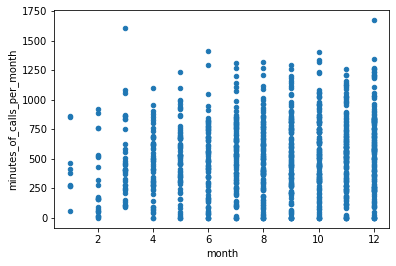

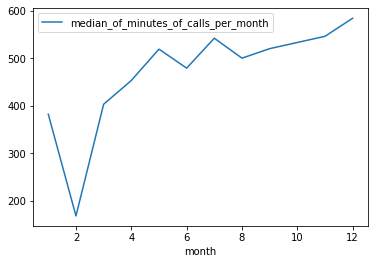

In [13]:
import matplotlib.pyplot as plt
import numpy as np
calls_ultra=profit_ultra[['user_id', 'month', 'minutes_of_calls_per_month']]
print(calls_ultra['minutes_of_calls_per_month'].describe())
pivot_ultra_calls=calls_ultra.pivot_table(index='month',values='minutes_of_calls_per_month', aggfunc='median')
display(calls_ultra.pivot_table(index='month',values='minutes_of_calls_per_month', aggfunc='median'))
calls_ultra.plot(x='month', y='minutes_of_calls_per_month', kind='scatter')
pivot_ultra_calls.columns=['median_of_minutes_of_calls_per_month']
pivot_ultra_calls.plot(y='median_of_minutes_of_calls_per_month')
print("дисперсия: ", np.var(calls_ultra['minutes_of_calls_per_month']))
print("среднее количество: ", calls_ultra['minutes_of_calls_per_month'].mean())
print("стандартное отклонение: ", np.std(calls_ultra['minutes_of_calls_per_month']))

Из графиков можно видеть, что наименьшее количество звонков абоненты совершают в феврале, а наибольшее-в июле и декабре. Декабрьские звонки могут быть связаны с новогодними праздниками.

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: messages_per_month, dtype: float64


,messages_per_month
month,
1.0,32.0
2.0,5.5
3.0,20.0
4.0,17.0
5.0,25.0
6.0,27.5
7.0,38.0
8.0,40.0
9.0,43.0


дисперсия:  2283.099557085194
среднее количество:  49.31338742393509
стандартное отклонение:  47.78179106192226


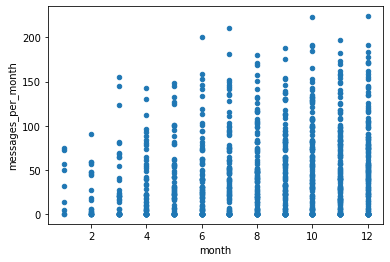

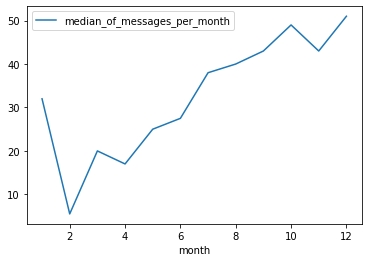

In [14]:
messages_ultra=profit_ultra[['user_id', 'month', 'messages_per_month']]
print(messages_ultra['messages_per_month'].describe())
pivot_ultra_messages=messages_ultra.pivot_table(index='month',values='messages_per_month', aggfunc='median')
display(pivot_ultra_messages)
messages_ultra.plot(x='month', y='messages_per_month', kind='scatter')
pivot_ultra_messages.columns=['median_of_messages_per_month']
pivot_ultra_messages.plot(y='median_of_messages_per_month')
print("дисперсия: ", np.var(messages_ultra['messages_per_month']))
print("среднее количество: ", messages_ultra['messages_per_month'].mean())
print("стандартное отклонение: ", np.std(messages_ultra['messages_per_month']))

На графиках можно видеть, что медиана количества смс в месяц растет с августа и достигает максимального значения в декабре, а затем начинает падать и достигает минимального значения в марте. Декабрьский максимум смс, возможно, такж евызван новогодними праздниками.

count      986.000000
mean     19430.916836
std      10091.910890
min          0.000000
25%      11737.250000
50%      19286.500000
75%      26809.000000
max      49701.000000
Name: mb_used_per_month, dtype: float64


,mb_used_per_month
month,
1.0,14777.0
2.0,7320.0
3.0,17475.0
4.0,16628.0
5.0,18679.0
6.0,19463.5
7.0,19996.0
8.0,18915.0
9.0,19639.0


дисперсия:  101743372.63811414
среднее количество:  19430.916835699798
стандартное отклонение:  10086.79198943421


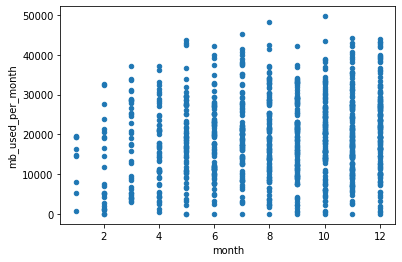

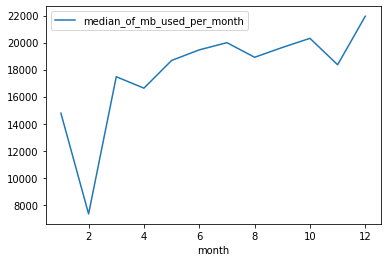

In [15]:
internet_ultra=profit_ultra[['user_id', 'month', 'mb_used_per_month']]
print(internet_ultra['mb_used_per_month'].describe())
pivot_ultra_internet=internet_ultra.pivot_table(index='month',values='mb_used_per_month', aggfunc='median')
display(pivot_ultra_internet)
internet_ultra.plot(x='month', y='mb_used_per_month', kind='scatter')
pivot_ultra_internet.columns=['median_of_mb_used_per_month']
pivot_ultra_internet.plot(y='median_of_mb_used_per_month')
print("дисперсия: ", np.var(internet_ultra['mb_used_per_month']))
print("среднее количество: ", internet_ultra['mb_used_per_month'].mean())
print("стандартное отклонение: ", np.std(internet_ultra['mb_used_per_month']))

Медианное значение использованного интернета имеет минимальное значение в январе, затем можно видеть рост медианного значения на протяжении всего года вплоть до декабря. В декабре медианное значение использованного интернета достигает своего максимума. Возможно, декабрьский максмимум связан с новогодними праздниками.

#### тариф smart

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: minutes_of_calls_per_month, dtype: float64


,minutes_of_calls_per_month
month,
1.0,162.5
2.0,258.0
3.0,409.0
4.0,368.5
5.0,433.0
6.0,400.0
7.0,414.0
8.0,432.0
9.0,435.0


дисперсия:  36265.124153109835
среднее количество:  417.747533632287
стандартное отклонение:  190.43404147659587


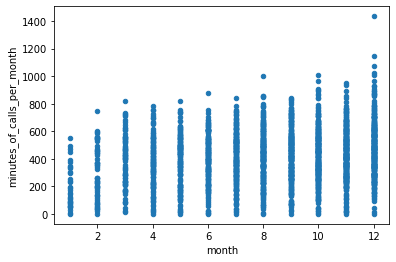

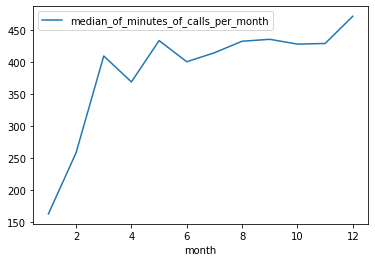

In [16]:
calls_smart=profit_smart[['user_id', 'month', 'minutes_of_calls_per_month']]
print(calls_smart['minutes_of_calls_per_month'].describe())
pivot_smart_calls=calls_smart.pivot_table(index='month',values='minutes_of_calls_per_month', aggfunc='median')
display(calls_smart.pivot_table(index='month',values='minutes_of_calls_per_month', aggfunc='median'))
calls_smart.plot(x='month', y='minutes_of_calls_per_month', kind='scatter')
pivot_smart_calls.columns=['median_of_minutes_of_calls_per_month']
pivot_smart_calls.plot(y='median_of_minutes_of_calls_per_month')
print("дисперсия: ", np.var(calls_smart['minutes_of_calls_per_month']))
print("среднее количество: ", calls_smart['minutes_of_calls_per_month'].mean())
print("стандартное отклонение: ", np.std(calls_smart['minutes_of_calls_per_month']))

На графиках можно видеть, что минимум медианного значения израсходованных минут разговора приходится на январь, затем можно набллюдать резкий рост до марта и последующий небольшой рост до декабря. В декабре медиана величины израсходованных минут достигает мвоего максимума. Возможно, всплески вызваны праздниками и, соответственно, более частыми звонками с поздравлениями в марте, мае и декабре.

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_per_month, dtype: float64


,messages_per_month
month,
1.0,15.0
2.0,20.0
3.0,23.0
4.0,28.0
5.0,30.0
6.0,28.0
7.0,29.0
8.0,27.0
9.0,30.0


дисперсия:  796.5978766916663
среднее количество:  33.36905829596412
стандартное отклонение:  28.22406555922917


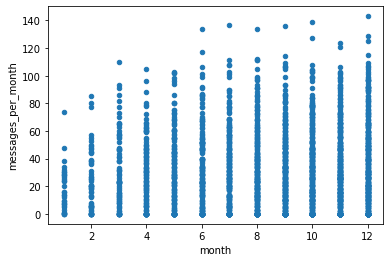

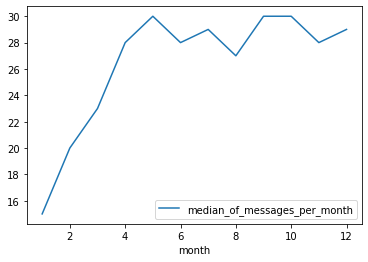

In [17]:
messages_smart=profit_smart[['user_id', 'month', 'messages_per_month']]
print(messages_smart['messages_per_month'].describe())
pivot_smart_messages=messages_smart.pivot_table(index='month',values='messages_per_month', aggfunc='median')
display(pivot_smart_messages)
messages_smart.plot(x='month', y='messages_per_month', kind='scatter')
pivot_smart_messages.columns=['median_of_messages_per_month']
pivot_smart_messages.plot(y='median_of_messages_per_month')
print("дисперсия: ", np.var(messages_smart['messages_per_month']))
print("среднее количество: ", messages_smart['messages_per_month'].mean())
print("стандартное отклонение: ", np.std(messages_smart['messages_per_month']))

Медианное значение отправленных смс за месяц имеет минимальную величину в январе, а затем можно видеть на графиках рост до мая. На май и сентябрь-октябрь приходят максимальные величины медианного значения отправленных смс за месяц. Но с мая по декабрь включительно можно наблюдать, что величины медианного значения находятся примерно на одинаковом уровне. 

count     2230.000000
mean     16180.319731
std       5872.128807
min          0.000000
25%      12613.000000
50%      16481.000000
75%      20016.750000
max      38510.000000
Name: mb_used_per_month, dtype: float64


,mb_used_per_month
month,
1.0,7086.5
2.0,12534.0
3.0,15651.0
4.0,14069.5
5.0,16302.0
6.0,16055.0
7.0,15903.0
8.0,16813.0
9.0,16007.0


дисперсия:  34466433.997772135
среднее количество:  16180.319730941705
стандартное отклонение:  5870.812039042992


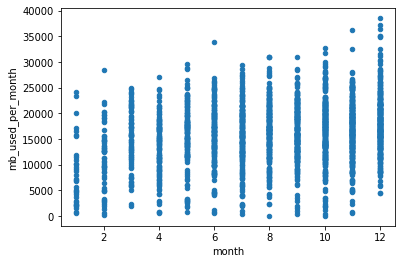

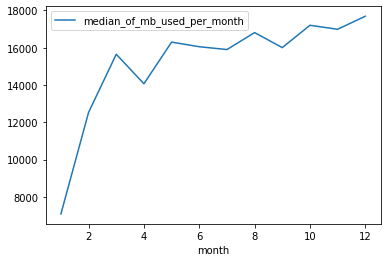

In [18]:
internet_smart=profit_smart[['user_id', 'month', 'mb_used_per_month']]
print(internet_smart['mb_used_per_month'].describe())
pivot_smart_internet=internet_smart.pivot_table(index='month',values='mb_used_per_month', aggfunc='median')
display(pivot_smart_internet)
internet_smart.plot(x='month', y='mb_used_per_month', kind='scatter')
pivot_smart_internet.columns=['median_of_mb_used_per_month']
pivot_smart_internet.plot(y='median_of_mb_used_per_month')
print("дисперсия: ", np.var(internet_smart['mb_used_per_month']))
print("среднее количество: ", internet_smart['mb_used_per_month'].mean())
print("стандартное отклонение: ", np.std(internet_smart['mb_used_per_month']))

Медианное значение использованного интернета имеет минимальное значение в январе, затем можно видеть рост медианного значения вплоть до марта и последующий выход "на плато" с небольшим увеличением к декабрю. В декабре медианное значение использованного интернета достигает своего максимума. Возможно, декабрьский максмимум связан с новогодними праздниками.

In [19]:
display(df)

,user_id,month,amount_of_calls_per_month,minutes_of_calls_per_month,messages_per_month,mb_used_per_month,tariff,city
0,1000,5.0,17.0,159.0,22.0,2252.0,ultra,Краснодар
1,1000,6.0,28.0,172.0,60.0,23213.0,ultra,Краснодар
2,1000,7.0,41.0,340.0,75.0,13988.0,ultra,Краснодар
3,1000,8.0,42.0,408.0,81.0,14043.0,ultra,Краснодар
4,1000,9.0,46.0,466.0,57.0,14556.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,21.0,19538.0,smart,Санкт-Петербург
3212,1489,11.0,0.0,0.0,20.0,17471.0,smart,Санкт-Петербург
3213,1489,12.0,0.0,0.0,35.0,17298.0,smart,Санкт-Петербург
3214,1128,NaN,0.0,0.0,0.0,0.0,ultra,Волжский


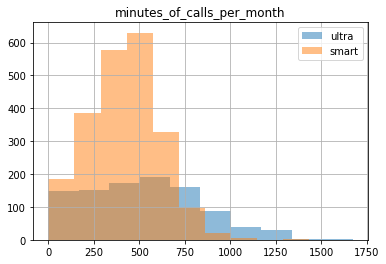

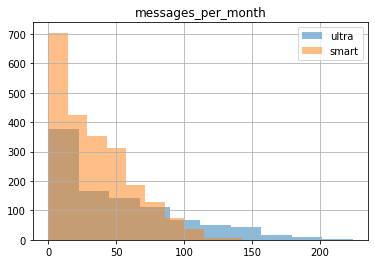

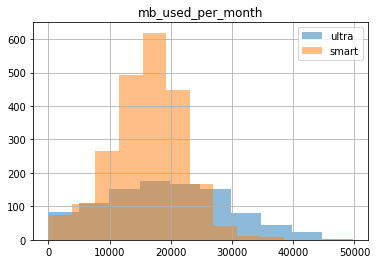

общая выручка от тарифа smart: 2868301.0
общая выручка от тарифа ultra: 2040450.0


In [20]:
for element in ['minutes_of_calls_per_month','messages_per_month', 'mb_used_per_month']:
    for tariff_name in df['tariff'].unique():
        (df.query('tariff==@tariff_name')[element].hist(bins=10,alpha=0.5,label=tariff_name))
    plt.title(element)
    plt.legend()
    plt.show()
print("общая выручка от тарифа smart:", profit_smart['profit_per_month'].sum())
print("общая выручка от тарифа ultra:", profit_ultra['profit_per_month'].sum())

Полученнные гистограммы представляют собой распределение Пуассона и демонстрируют, что абоненты, имеющие тариф smart значительно чаще звонят, пишут смс и больше расходуют интернет-трафик.Стоит отметить, что пользователям тарифа smart достаточно часто не хвает минут разговора, смс и интернет-трафика и они вынуждены переплачивать за эти опции. Пользователи тарифа ultra докупают только интернет, а в лимит по количеству минут и смс - укладываются.

## 4. Проверка гипотез <a id='4'></a>

#### гипотеза: средняя выручка пользователей тарифов ultra и smart различается

p-значение:  1.5359815168867794e-162
Отвергаем нулевую гипотезу


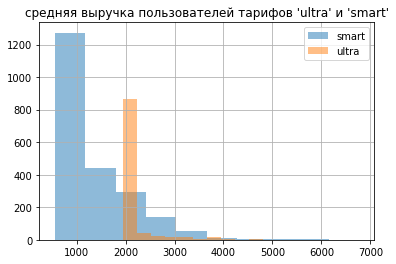

In [21]:
from scipy import stats as st 
 
alpha=0.05
results = st.ttest_ind( profit_smart['profit_per_month'],profit_ultra['profit_per_month']) 

print('p-значение: ', results.pvalue)
if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")
profit_smart['profit_per_month'].hist(bins=10,alpha=0.5,label="smart")
profit_ultra['profit_per_month'].hist(bins=10,alpha=0.5,label="ultra")
plt.title("средняя выручка пользователей тарифов 'ultra' и 'smart'")
plt.legend()
plt.show()

Проверим нулевую гипотезу H0: средняя выручка пользователей тарифов smart и ultra равна. В результате анализа двух выборок ежемесячной выручки от абонентов, использующих тариф smart, и абонентов, использующих тариф ultra, получили, что р-значение близко к 0. Значит, что нулевую гипотезу следует отвергнуть, т.е. средняя выручка пользователей тарифов ultra и smart не равна. На гистограмме можно видеть, что средняя выручка пользователей тарифа "смарт" выше, чем "ультра"

#### гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

,user_id,month,amount_of_calls_per_month,minutes_of_calls_per_month,messages_per_month,mb_used_per_month,tariff,city,profit_per_month
8,1001,11.0,45.0,430.0,0.0,18405.0,smart,Москва,1150.0
9,1001,12.0,47.0,414.0,0.0,14018.0,smart,Москва,550.0
10,1002,6.0,14.0,117.0,4.0,10844.0,smart,Стерлитамак,550.0
11,1002,7.0,21.0,214.0,11.0,17557.0,smart,Стерлитамак,1150.0
12,1002,8.0,37.0,289.0,13.0,20298.0,smart,Стерлитамак,1550.0
...,...,...,...,...,...,...,...,...,...
3205,1473,9.0,0.0,0.0,19.0,17276.0,ultra,Красноярск,1950.0
3206,1473,10.0,0.0,0.0,20.0,13676.0,ultra,Красноярск,1950.0
3207,1473,11.0,0.0,0.0,14.0,21654.0,ultra,Красноярск,1950.0
3208,1473,12.0,0.0,0.0,20.0,18402.0,ultra,Красноярск,1950.0


p-значение:  0.5318623146051247
Принимаем нулевую гипотезу


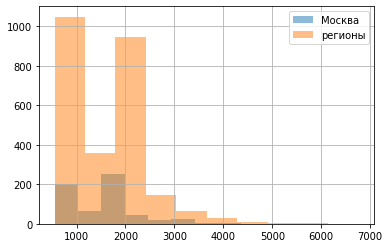

In [22]:
alpha=0.05
df_profit=pd.concat([profit_smart, profit_ultra])
display(df_profit)
results=st.ttest_ind(df_profit.query('city=="Москва"')['profit_per_month'], df_profit.query('~(city=="Москва")')['profit_per_month'])
print('p-значение: ', results.pvalue)
if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

df_profit.query('city=="Москва"')['profit_per_month'].hist(bins=10,alpha=0.5,label="Москва")
df_profit.query('~(city=="Москва")')['profit_per_month'].hist(bins=10,alpha=0.5,label="регионы")
plt.legend()
plt.show()


Проверим нулевую гипотезу H0: средняя выручка пользователей из Москвы не отличается(т.е. равна) от средней выручки пользователей из других регионов. В результате анализа двух выборок ежемесячной выручки от абонентов из Москвы и абонентов из регионов получили, что р-значение более порогового значения alpha, принятого равным 5%. Значит, что нулевую гипотезу следует принять, т.е. средняя выручка пользователей из Москвы и из регионов равна, что демонструет гистограмма.

## Общий вывод<a id='sol'></a>

В результате анализа были отвергнуты сформулированные гипотезы:    
**1.** средняя выручка пользователей тарифов ultra и smart равны    
**2.** средняя выручка пользователей из Москвы не отличается(т.е. равна) от средней выручки пользователей из других регионов.    
Было найдено, что   
**1.** средняя выручка пользователей тарифа "смарт" выше, чем "ультра"    
**2.** средняя выручка от абонентов из регионов и абонентов из Москвы равна.   
Стоит отметить, что общая выручка от тарифа smart: 2868301.0, в то время как, общая выручка от тарифа ultra: 2040450.0. Пользователям тарифа smart достаточно часто не хвает минут разговора, смс и интернет-трафика и они вынуждены переплачивать за эти опции. Пользователи тарифа ultra докупают только интернет, а в лимит по количеству минут и смс - укладываются. Из данных о 3216 абонентах 986 использовали тариф ultra и 2230 smart. Из этих данных можно сделать вывод, что тариф smart более прибылен для сотового оператора.